In [1]:
!pip install pandas matplotlib seaborn

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSVs
plain_df = pd.read_csv('plain_metrics.csv')
obf_df = pd.read_csv('obfuscation_metrics.csv')
llm_df = pd.read_csv('llm_obfuscation_metrics.csv')

# Merge on Filename
merged_df_test = pd.merge(plain_df, llm_df, on='Filename', suffixes=('_plain', '_llm'))
merged = merged_df_test.merge(obf_df[['Filename', 'Time']], on='Filename', how='left')
merged_df = merged.head(100)
# Set style
sns.set(style="whitegrid")


In [31]:
print(merged_df[merged_df['Cyclomatic Complexity'] != -1])

Empty DataFrame
Columns: [Filename, OriginalLength_plain, ReadabilityScore, CyclomaticComplexity, VariableEntropy, OriginalLength_llm, ObfuscatedLength, Readability, Cyclomatic Complexity, Variable Entropy, Levenshtein Distance, Functionality Preserved, Deobfuscation Resistance, Time]
Index: []


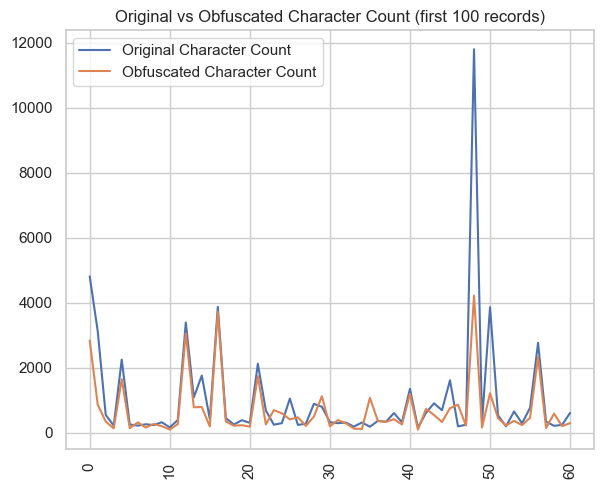

In [33]:
# 1. OriginalLength vs ObfuscatedLength
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Use index for x-axis
x = merged_df.index
y1 = merged_df['OriginalLength_plain']
y2 = merged_df['ObfuscatedLength']

sns.set(style='whitegrid')
plt.figure(figsize=(15, 25))

# 1. OriginalLength (plain) vs ObfuscatedLength (trad)
plt.subplot(4, 2, 1)
plt.plot(x, y1, label='Original Character Count', linestyle='-')
plt.plot(x, y2, label='Obfuscated Character Count', linestyle='-')
plt.xticks(rotation=90)
plt.title('Original vs Obfuscated Character Count (first 100 records)')
plt.legend()


In [ ]:
print(merged_df.head())

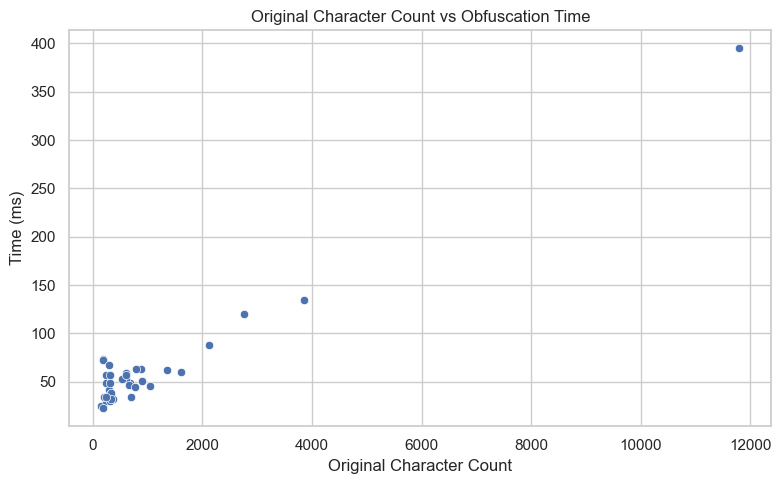

In [34]:
# 2. OriginalLength vs TimeMs (scatter)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged['OriginalLength_plain'], y=merged['Time'])
plt.title('Original Character Count vs Obfuscation Time')
plt.xlabel('Original Character Count')
plt.ylabel('Time (ms)')
plt.tight_layout()
plt.show()

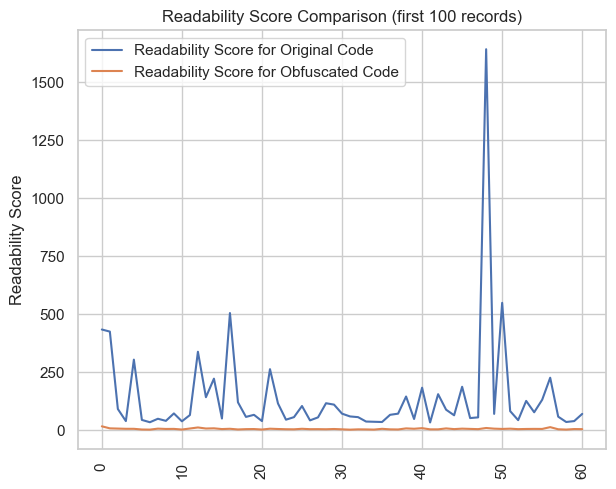

In [35]:
# Use index for x-axis
x = merged_df.index
y1 = merged_df['ReadabilityScore']
y2 = merged_df['Readability']

sns.set(style='whitegrid')
plt.figure(figsize=(15, 25))

# 1. OriginalLength (plain) vs ObfuscatedLength (trad)
plt.subplot(4, 2, 1)
plt.plot(x, y1, label='Readability Score for Original Code', linestyle='-')
plt.plot(x, y2, label='Readability Score for Obfuscated Code', linestyle='-')
plt.xticks(rotation=90)
plt.ylabel('Readability Score')
plt.title('Readability Score Comparison (first 100 records)')
plt.legend()



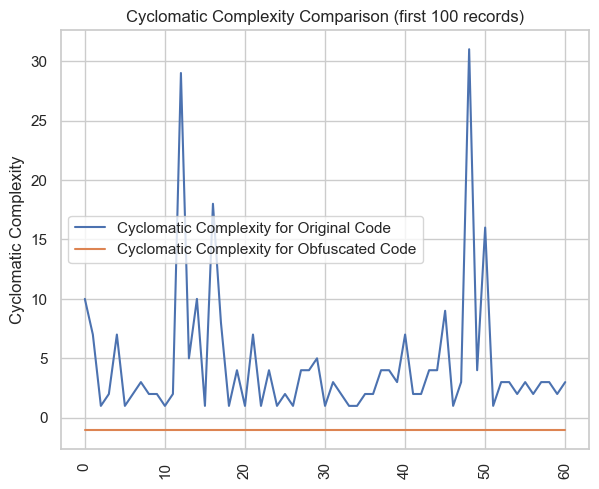

In [18]:

# Use index for x-axis
x = merged_df.index
y1 = merged_df['CyclomaticComplexity']
y2 = merged_df['Cyclomatic Complexity']

sns.set(style='whitegrid')
plt.figure(figsize=(15, 25))

# 1. OriginalLength (plain) vs ObfuscatedLength (trad)
plt.subplot(4, 2, 1)
plt.plot(x, y1, label='Cyclomatic Complexity for Original Code', linestyle='-')
plt.plot(x, y2, label='Cyclomatic Complexity for Obfuscated Code', linestyle='-')
plt.xticks(rotation=90)
plt.ylabel('Cyclomatic Complexity')
plt.title('Cyclomatic Complexity Comparison (first 100 records)')
plt.legend()



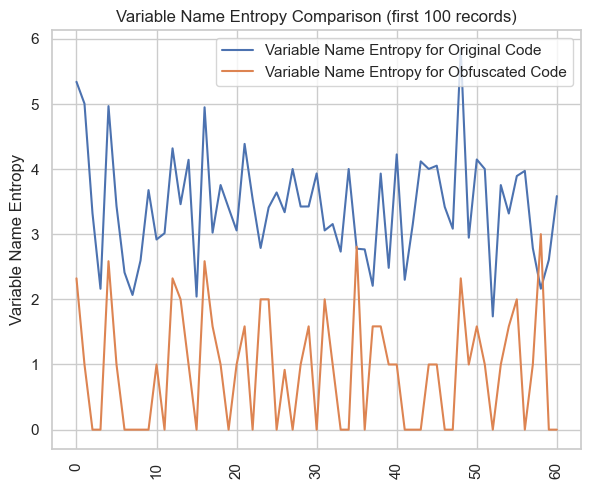

In [19]:
# 5. VariableEntropy comparison
# Use index for x-axis
x = merged_df.fillna(0).index
y1 = merged_df.fillna(4)['VariableEntropy']
y2 = merged_df.fillna(4)['Variable Entropy']

sns.set(style='whitegrid')
plt.figure(figsize=(15, 25))

# 1. OriginalLength (plain) vs ObfuscatedLength (trad)
plt.subplot(4, 2, 1)
plt.plot(x, y1, label='Variable Name Entropy for Original Code', linestyle='-')
plt.plot(x, y2, label='Variable Name Entropy for Obfuscated Code', linestyle='-')
plt.xticks(rotation=90)
plt.ylabel('Variable Name Entropy')
plt.title('Variable Name Entropy Comparison (first 100 records)')
plt.legend()




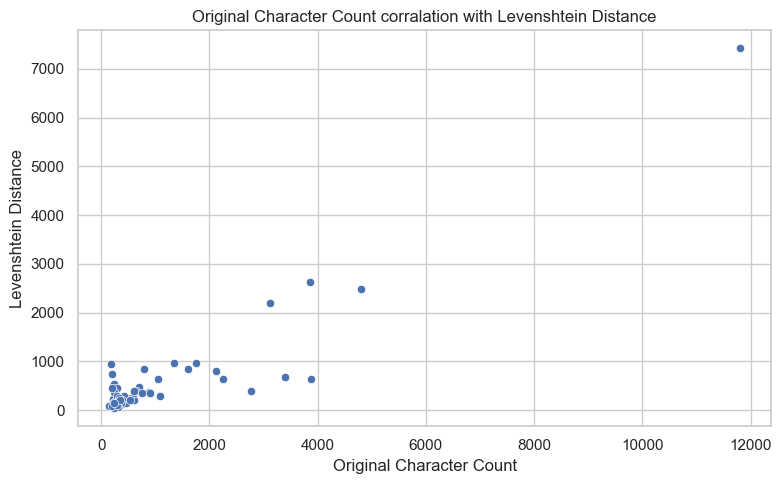

In [20]:
# 6. OriginalLength vs LevenshteinDistance (scatter)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged['OriginalLength_plain'], y=merged['Levenshtein Distance'])
plt.title('Original Character Count corralation with Levenshtein Distance')
plt.xlabel('Original Character Count')
plt.ylabel('Levenshtein Distance')
plt.tight_layout()
plt.show()


In [21]:
merged = merged.dropna()

In [22]:
avg_length_increase = (merged['ObfuscatedLength'] - merged['OriginalLength_plain']).mean()
avg_readability_increase = (merged['Readability'] - merged['ReadabilityScore']).mean()
avg_complexity_increase = (merged['Cyclomatic Complexity'] - merged['CyclomaticComplexity']).mean()
avg_entropy_increase = (merged['Variable Entropy'] - merged['VariableEntropy']).mean()

In [23]:
length_pct = ((merged['ObfuscatedLength'] - merged['OriginalLength_plain']) / merged['OriginalLength_plain']).mean() * 100
readability_pct = ((merged['Readability'] - merged['ReadabilityScore']) / merged['ReadabilityScore']).mean() * 100
complexity_pct = ((merged['Cyclomatic Complexity'] - merged['CyclomaticComplexity']) / merged['CyclomaticComplexity']).mean() * 100
entropy_pct = ((merged['Variable Entropy'] - merged['VariableEntropy']) / merged['VariableEntropy']).mean() * 100

In [24]:
print(f"Average Length Increase: {avg_length_increase:.2f} chars ({length_pct:.2f}%)")
print(f"Average Readability Score Change: {avg_readability_increase:.2f} ({readability_pct:.2f}%)")
print(f"Average Cyclomatic Complexity Change: {avg_complexity_increase:.2f} ({complexity_pct:.2f}%)")
print(f"Average Variable Entropy Change: {avg_entropy_increase:.2f} ({entropy_pct:.2f}%)")

Average Length Increase: -342.42 chars (16.76%)
Average Readability Score Change: -141.09 (-93.69%)
Average Cyclomatic Complexity Change: -5.17 (-143.59%)
Average Variable Entropy Change: -2.38 (-69.98%)


In [26]:
print(merged['Levenshtein Distance'].mean())

635.6944444444445


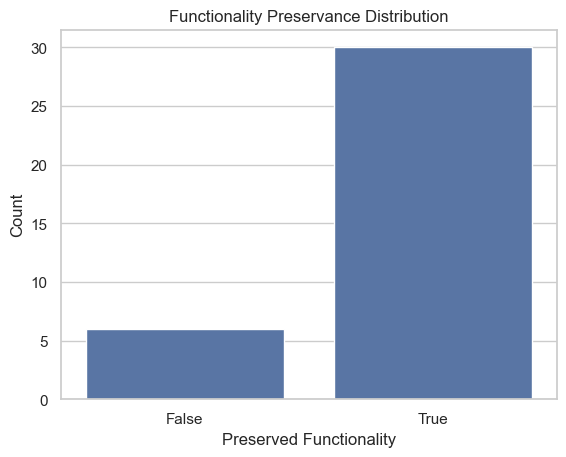

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot (works great for True/False)
sns.set(style="whitegrid")
sns.countplot(data=merged, x="Functionality Preserved")

plt.title("Functionality Preservance Distribution")
plt.xlabel("Preserved Functionality")
plt.ylabel("Count")
plt.show()


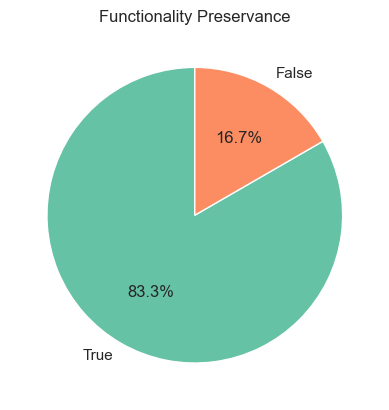

In [28]:
merged['Functionality Preserved'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['True', 'False'],
    startangle=90,
    colors=['#66c2a5','#fc8d62']
)

plt.title("Functionality Preservance")
plt.ylabel("")  # Hide y-axis label
plt.show()


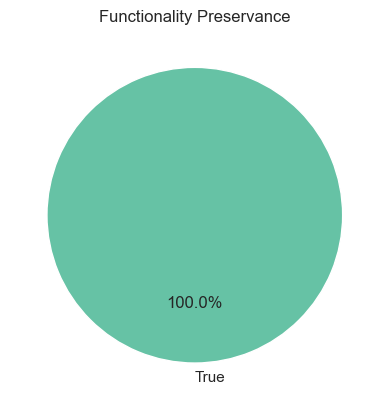

In [30]:
full_df = pd.DataFrame({
    'Functionality Preserved': [True, True, True, True, True, True]
})

full_df['Functionality Preserved'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['True', 'False'],
    startangle=90,
    colors=['#66c2a5','#fc8d62']
)


plt.title("Functionality Preservance")
plt.ylabel("")  # Hide y-axis label
plt.show()